# Setup

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# set custom fonts
from matplotlib import font_manager
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Mandalore-K77lD.otf')

In [2]:
# load cleaned data
df = pd.read_csv('https://raw.githubusercontent.com/Lisa-Ho/small-data-projects/main/2023/2308-star-wars-scripts/episode1_each_line_of_anakin_clean.csv')

# print first rows to check it's all looking ok
df.head()

,id,to,text,number,episode
0,271.0,WATTO,Mel tassa cho-passa,3,1
1,274.0,PADME,Are you an angel?,4,1
2,276.0,PADME,An angel. I've heard the deep space pilots tal...,46,1
3,278.0,PADME,I listen to all the traders and star pilots wh...,27,1
4,280.0,PADME,All mylife.,2,1


In [ ]:
# Prepare data before plotting

# calculate corect angular position in circle
x_max = 2*np.pi
df['x_coords'] = np.linspace(0, x_max, len(df), endpoint=False)

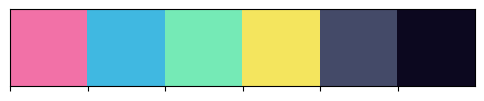

In [13]:
# Define chart colors

# set main background color for visual
bg_color = '#0C081F'

# set colors for who Anakin talks to and map them to the data
# inspired by: https://pudding.cool/2018/09/wiki-billboard/
bar_colors = {'QUI-GON': '#F271A7', 'PADME': '#40B8E1', 'OBI-WAN':'#75EAB6' , 'R2D2': '#F4E55E'}
df['colors'] = df['to'].map(bar_colors)

# fill with neutral color for secondary characters
bar_colors_other = '#444A68'
df['colors'] = df['colors'].fillna(bar_colors_other)

# we can check our color palette using seaborn
sns.palplot(list(bar_colors.values()) + [bar_colors_other]  + [bg_color])

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_14644\3035093612.py:19: RuntimeWarning: invalid value encountered in sqrt
  forward = lambda value: ((value + v_offset) * alpha)**0.5 + r_offset


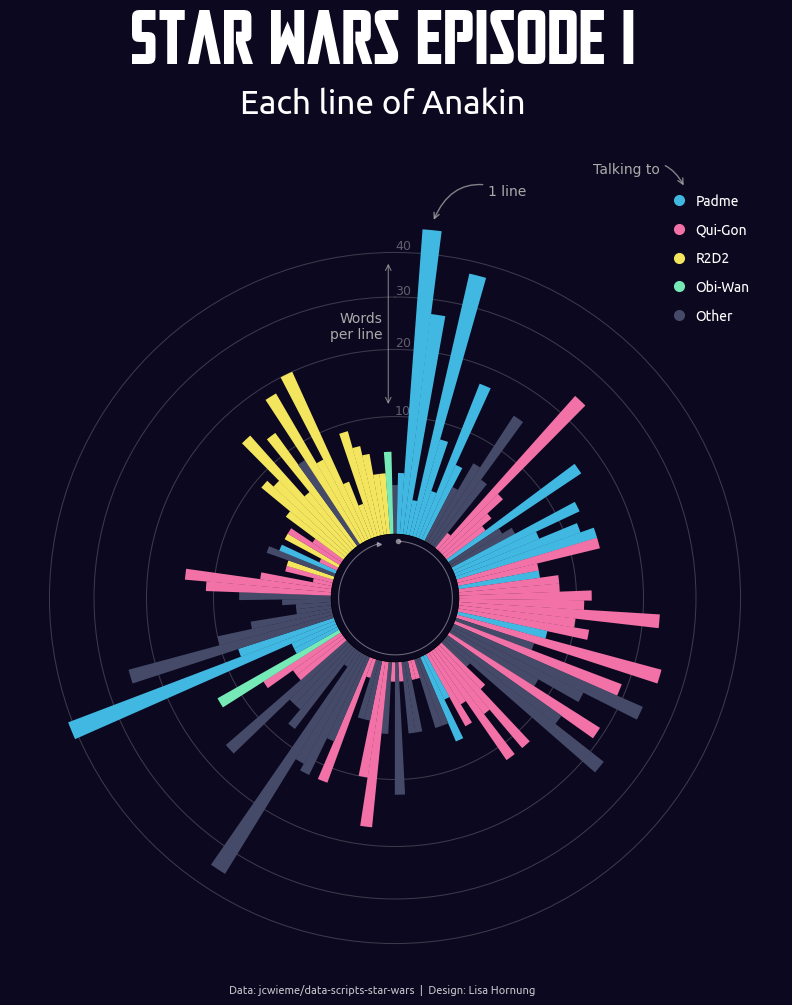

In [47]:
# plot each line of Anakin

# ========= 
# setup figure with polar projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
fig.set_facecolor(bg_color)

# ========= 
# plot data
ax.bar(df['x_coords'], df['number'], alpha=1, color=df['colors'] , linewidth=0, width=0.052, zorder=3)

# ========= 
# format axis

# scale y-axis to account for area size of bars 
# code sourced from this tutorial: https://www.chiark.greenend.org.uk/~peterb/python/polar/
max_value = 50
r_offset = -10
r2 = max_value - r_offset
alpha = r2 - r_offset
v_offset = r_offset**2 / alpha
forward = lambda value: ((value + v_offset) * alpha)**0.5 + r_offset
reverse = lambda radius: (radius - r_offset) ** 2 / alpha - v_offset

ax.set_rlim(0, max_value)
ax.set_rorigin(r_offset)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)   
ax.set_yscale('function', functions=(
    lambda value: np.where(value >= 0, forward(value), value),
    lambda radius: np.where(radius > 0, reverse(radius), radius)))

# format labels and grid
ax.set_rlabel_position(0)
ax.set_yticks([10,20,30,40])
ax.set_yticklabels([10,20,30,40],fontsize=9, color='white',alpha=0.35)
ax.set_thetagrids(angles=[])
ax.grid(visible=True, axis='y', zorder=2, color = 'white', linewidth=0.75, alpha=0.2)
ax.spines[:].set_visible(False)
ax.set_facecolor(bg_color)

# ========= 
# add custom legend

# Axis to hold legend
lgd = fig.add_axes([0.75,0.71, 0.15, 0.25]) 
kw = dict(marker='o', color=bg_color, markersize=8, alpha=1, markeredgecolor='None', linewidth=0)
legend_elements2 =[Line2D([0], [0], markerfacecolor=bar_colors['PADME'], label='Padme', **kw), 
                  Line2D([0], [0], markerfacecolor=bar_colors['QUI-GON'], label='Qui-Gon', **kw), 
                  Line2D([0], [0], markerfacecolor=bar_colors['R2D2'], label='R2D2', **kw), 
                  Line2D([0], [0], markerfacecolor=bar_colors['OBI-WAN'], label='Obi-Wan', **kw), 
                  Line2D([0], [0], markerfacecolor=bar_colors_other, label='Other', **kw)] 
L = lgd.legend(frameon=False, handles=legend_elements2, loc='center', ncol=1, handletextpad=0.2, labelspacing=1)
plt.setp(L.texts, va='baseline', color='white', size=16, fontproperties=label_font,)    
lgd.axis('off')

# ========= 
# Annotations

# add new axis to draw an inner circle
circ = fig.add_axes([0.453, 0.435, 0.12, 0.12],polar=True) 
line_theta = df['x_coords'][1:-5]
line_r = [5] * len(line_theta)
circ.plot(line_theta, line_r, zorder=5, color='white', linewidth=0.75, alpha=0.4)
circ.plot(line_theta.to_list()[0], line_r[0], zorder=5, color='white', linewidth=0,marker='o', markersize=3,alpha=0.4)
circ.plot(line_theta.to_list()[-1], line_r[-1], zorder=5, color='white', linewidth=0,marker='>', markersize=3,alpha=0.4)
circ.set_theta_zero_location('N')
circ.set_theta_direction(-1)  
circ.axis('off')

# text annotations
ax.annotate('1 line', xy=(0.1, 48), xycoords='data', xytext=(40, 20), textcoords='offset points', 
                   fontsize=10,  ha='left', va='baseline', annotation_clip=False, color='#ababab',
                    arrowprops=dict(arrowstyle='->',edgecolor='#ababab', connectionstyle='arc3,rad=.5', alpha=0.75))
ax.annotate('Words\nper line', xy=(-0.05, 22), xycoords='data', xytext=(0, 0), textcoords='offset points', 
                   fontsize=10,  ha='right', va='baseline', annotation_clip=False, color='#ababab')
ax.annotate('', xy=(-0.02, 38), xycoords='data', xytext=(0, -105), textcoords='offset points', 
                   fontsize=10,  ha='right', va='baseline', annotation_clip=False, color='#ababab',
                   arrowprops=dict(arrowstyle='<->',edgecolor='#ababab', connectionstyle='arc3,rad=0', alpha=0.75, linewidth=0.75)
                    )
lgd.annotate('Talking to', xy=(0.35, 0.78), xycoords='data', xytext=(-18, 14), textcoords='offset points', 
                   fontsize=10,  ha='right', va='center', annotation_clip=False, color='#ababab',
                    arrowprops=dict(arrowstyle='->',edgecolor='#ababab', connectionstyle='arc3,rad=-.5', alpha=0.75))

# ========= 
# Title + Credits
plt.figtext(0.5,1.03, 'Star Wars Episode I', fontproperties=title_font, fontsize=55, color='white', ha='center')
plt.figtext(0.5,0.98, 'Each line of Anakin', fontproperties=label_font,fontsize=24, color='white', ha='center')
plt.figtext(0.5,0.1, 'Data: jcwieme/data-scripts-star-wars  |  Design: Lisa Hornung', fontproperties=label_font,fontsize=8, 
           color='white', ha='center', alpha=0.75)

#plt.savefig('episode-I-each-line-anakin.png', bbox_inches='tight', dpi=300, pad_inches=0.8)

plt.show()